这个文档实现了几个聚类方法：(sklearn.cluster)
1. K均值聚类(.KMeans)(考察ncluster,n_init)
2. 密度聚类(.DBSCAN)(考察$\epsilon$,min_samples)
3. 层次聚类(.AgglomerativeClustering)(考察ncluster,linkage)
4. 混合高斯模型(sklearn.mixture.GaussianMixture)(考察n_conponents,cov_type)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
from sklearn import mixture

给出产生数据的函数：

In [2]:
def create_data(centers,num=100,std=0.7):
    X, labels_true = make_blobs(n_samples=num, centers = centers, cluster_std=std)
    return X, labels_true

观察生成的样本点：

In [3]:
def plot_data(*data):
    X, labels_true = data
    labels = np.unique(labels_true)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colors = 'rgbyckm'
    for i,label in enumerate(labels):
        position = labels_true ==label
        ax.scatter(X[position,0],X[position,1],label="cluster %d"%label,
                  color = colors[i%len(colors)])
    ax.legend(loc="best", framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()

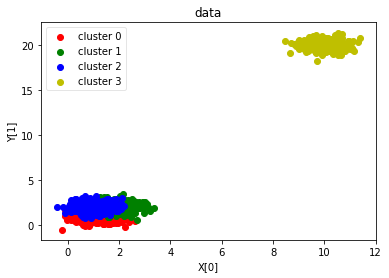

In [4]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],],num=1000,std=0.5)
plot_data(X, labels_true)

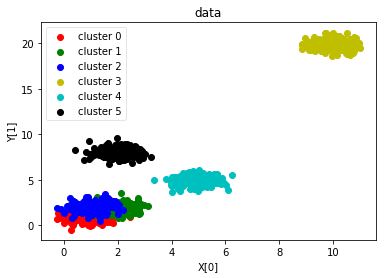

In [5]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
plot_data(X, labels_true)

___

**K均值聚类(KMeans)**

In [6]:
def test_Kmeans(*data):
    X,labels_true = data
    clst = cluster.KMeans()
    clst.fit(X)
    predicted_labels = clst.predict(X)
    print("ARI:%s" %adjusted_rand_score(labels_true,predicted_labels))
    print("Sum center distance %s" %clst.inertia_)

调用函数test_KMeans：

In [7]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_Kmeans(X,labels_true)

ARI:0.34380260668439633
Sum center distance 231.73946625942517


In [8]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_Kmeans(X, labels_true)

ARI:0.7004643130486181
Sum center distance 368.80514917901996


考察簇的数量的影响：

In [9]:
def test_Kmeans_nclusters(*data):
    X,labels_true = data
    nums = range(1,50)
    ARIs = []
    Distances = []
    for num in nums:
        clst = cluster.KMeans(n_clusters = num)
        clst.fit(X)
        predicted_labels = clst.predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances.append(clst.inertia_)
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs, marker="+")
    ax.set_xlabel("n_cluster")
    ax.set_ylabel("ARI")
    ax = fig.add_subplot(1,2,2)
    ax.plot(nums,Distances,marker='o')
    ax.set_xlabel("n_cluster")
    ax.set_ylabel("inertia_")
    fig.suptitle("KMeans")
    plt.show()

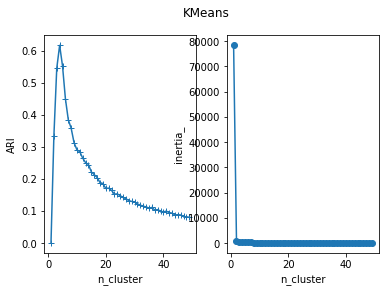

In [10]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_Kmeans_nclusters(X,labels_true)

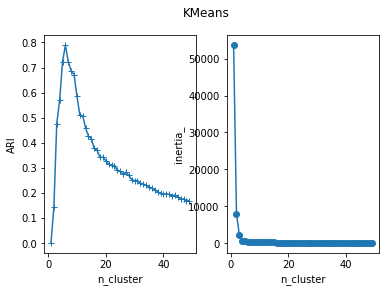

In [11]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_Kmeans_nclusters(X, labels_true)

考察k均值算法的运行次数和选择初始中心向量策略的影响：

In [12]:
def test_Kmeans_n_init(*data):
    X, labels_true = data
    nums = range(1,50)
    
    ### 绘图
    fig = plt.figure()
    ARIs_k = []
    Distances_k = []
    ARIs_r = []
    Distances_r = []
    for num in nums:
        clst = cluster.KMeans(n_init=num, init='k-means++')
        clst.fit(X)
        predicted_labels = clst.predict(X)
        ARIs_k.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances_k.append(clst.inertia_)
        
        clst = cluster.KMeans(n_init=num, init='random')
        clst.fit(X)
        predicted_labels = clst.predict(X)
        ARIs_r.append(adjusted_rand_score(labels_true,predicted_labels))
        Distances_r.append(clst.inertia_)
        
    ax = fig.add_subplot(1,2,1)
    ax.plot(nums,ARIs_k, marker="+", label="k-means++")
    ax.plot(nums,ARIs_r, marker="+", label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("ARI")
    ax.set_ylim(0,1)
    ax.legend("best")
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(nums,ARIs_k, marker="o", label="k-means++")
    ax.plot(nums,ARIs_r, marker="o", label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("inertia_")
    ax.legend("best")
    
    fig.suptitle("KMeans")
    plt.show()

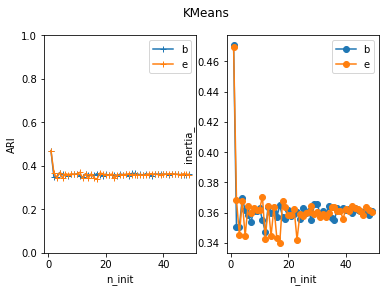

In [13]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_Kmeans_n_init(X,labels_true)

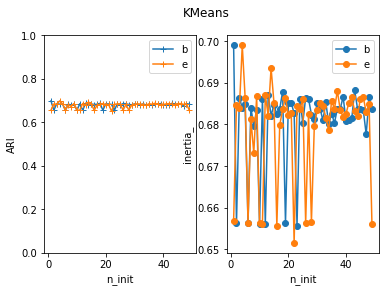

In [14]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_Kmeans_n_init(X, labels_true)

---

**密度聚类DBSCAN**

In [15]:
def test_DBSCAN(*data):
    X,labels_true = data
    clst = cluster.DBSCAN()
    predicted_labels = clst.fit_predict(X)
    print("ARI:%s" %adjusted_rand_score(labels_true,predicted_labels))
    print("Core sample num:%d" %len(clst.core_sample_indices_))

In [16]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_DBSCAN(X,labels_true)

ARI:0.3326665162415609
Core sample num:988


In [17]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_DBSCAN(X, labels_true)

ARI:0.562457356838566
Core sample num:981


考察参数$\epsilon$的影响：

In [18]:
def test_DBSCAN_epsilon(*data):
    X,labels_true = data
    epsilons = np.logspace(-1,1.5)
    ARIs = []
    Core_nums = []
    for epsilon in epsilons:
        clst = cluster.DBSCAN(eps = epsilon)
        predicted_labels = clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))
        
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    ax.plot(epsilons, ARIs, marker = '+')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(epsilons, Core_nums, marker = 'o')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon")
    ax.set_ylabel('Core_nums')
    
    fig.suptitle("DBSCAN")
    plt.show()

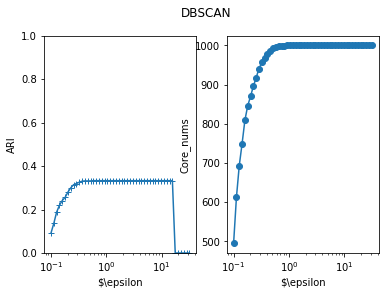

In [19]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_DBSCAN_epsilon(X,labels_true)

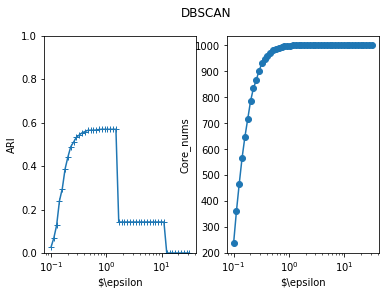

In [20]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_DBSCAN_epsilon(X, labels_true)

考察MinPts参数的影响：

In [21]:
def test_DBSCAN_min_samples(*data):
    X,labels_true = data
    min_samples = range(1,100)
    ARIs = []
    Core_nums = []
    for num in min_samples:
        clst = cluster.DBSCAN(min_samples = num)
        predicted_labels = clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))
        
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1)
    ax.plot(min_samples, ARIs, marker = '+')
    ax.set_xlabel("min_samples")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(min_samples, Core_nums, marker = 'o')
    ax.set_xlabel("min_samples")
    ax.set_ylabel('Core_nums')
    
    fig.suptitle("DBSCAN")
    plt.show()

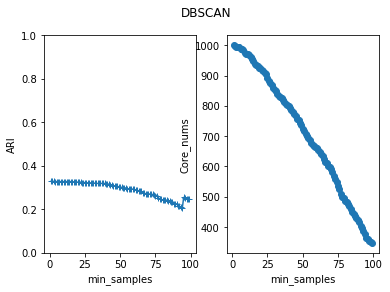

In [22]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_DBSCAN_min_samples(X,labels_true)

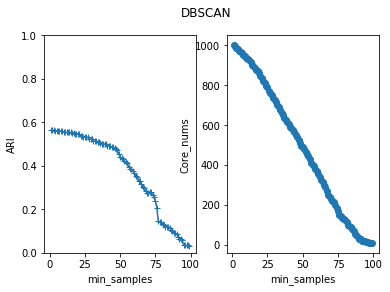

In [23]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_DBSCAN_min_samples(X, labels_true)

**层次聚类AgglomerativeClustering**

In [24]:
def test_AgglomerativeClustering(*data):
    X,labels_true = data
    clst = cluster.AgglomerativeClustering()
    predicted_labels = clst.fit_predict(X)
    print("ARI: %s" %adjusted_rand_score(labels_true,predicted_labels))

In [25]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_AgglomerativeClustering(X,labels_true)

ARI: 0.33266533066132264


In [26]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_AgglomerativeClustering(X,labels_true)

ARI: 0.1425379369115198


考察簇的数量对聚类效果的影响：

In [27]:
def test_AgglomerativeClustering_nclusters(*data):
    X,labels_true = data
    nums = range(1,50)
    ARIs = []
    for num in nums:
        clst = cluster.AgglomerativeClustering(n_clusters=num)
        predicted_labels = clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(nums, ARIs, marker = '+')
    ax.set_xlabel("n_clusters")
    ax.set_ylabel('ARI')
    fig.suptitle("AgglomerativeClustering")
    plt.show()

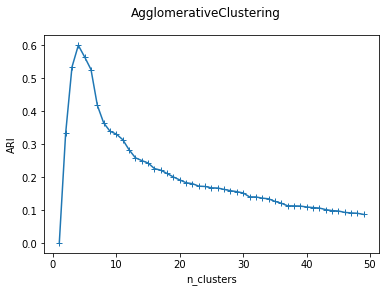

In [28]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_AgglomerativeClustering_nclusters(X,labels_true)

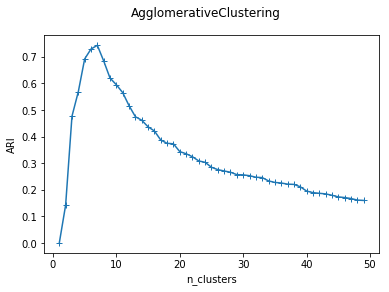

In [29]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_AgglomerativeClustering_nclusters(X,labels_true)

考察链接方式的影响：

In [30]:
def test_AgglomerativeClustering_linkage(*data):
    X,labels_true = data
    nums = range(1,50)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    linkages=['ward','complete','average']
    markers="+o*"
    for i,linkage in enumerate(linkages):
        ARIs = []
        for num in nums:
            clst = cluster.AgglomerativeClustering(n_clusters=num,linkage = linkage)
            predicted_labels = clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="Linkage:%s"%linkage)
        
    ax.set_xlabel("n_clusters")
    ax.set_ylabel('ARI')
    ax.legend("best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()

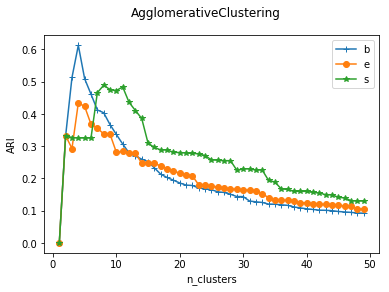

In [31]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_AgglomerativeClustering_linkage(X,labels_true)

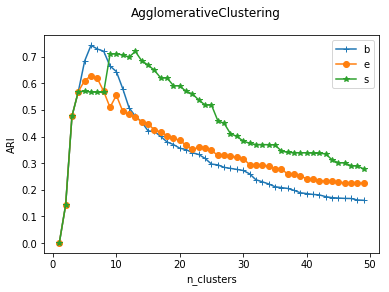

In [32]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_AgglomerativeClustering_linkage(X,labels_true)

---

**混合高斯模型GaussianMixture**

In [39]:
def test_GMM(*data):
    X,labels_true = data
    clst = mixture.GaussianMixture()
    clst.fit(X)
    predicted_labels = clst.predict(X)
    print("ARI: %s" %adjusted_rand_score(labels_true,predicted_labels))

In [40]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_GMM(X,labels_true)

ARI: 0.0


In [42]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_GMM(X,labels_true)

ARI: 0.0


考察族的数量n_components:

In [49]:
def test_GMM_n_components(*data):
    X,labels_true = data
    nums = range(1,50)
    ARIs = []
    
    for num in nums:
        clst = mixture.GaussianMixture(n_components=num,)
        clst.fit(X)  
        predicted_labels = clst.predict(X)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(nums,ARIs,marker="+")
    ax.set_xlabel("n_components")
    ax.set_ylabel('ARI')
    ax.legend("best")
    fig.suptitle("GMM")
    plt.show()

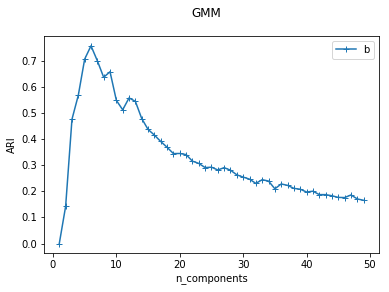

In [50]:
X, labels_true = create_data([[1,1],[2,2],[1,2],[10,20],[5,5],[2,8]],num=1000,std=0.5)
test_GMM_n_components(X,labels_true)

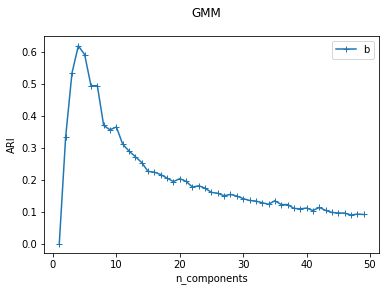

In [51]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_GMM_n_components(X,labels_true)

考察协方差类型的影响：

In [52]:
def test_GMM_n_cov_type(*data):
    X,labels_true = data
    nums = range(1,50)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    cov_type=['spherical','tied','diag','full']
    markers="+o*s"
    for i,cov_type in enumerate(cov_type):
        ARIs = []
        for num in nums:
            clst = mixture.GaussianMixture(n_components=num,covariance_type=cov_type)
            clst.fit(X)
            predicted_labels = clst.predict(X)
            ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        ax.plot(nums,ARIs,marker=markers[i],label="covariance_type:%s"%cov_type)
        
    ax.set_xlabel("n_components")
    ax.set_ylabel('ARI')
    ax.legend("best")
    fig.suptitle("GMM")
    plt.show()

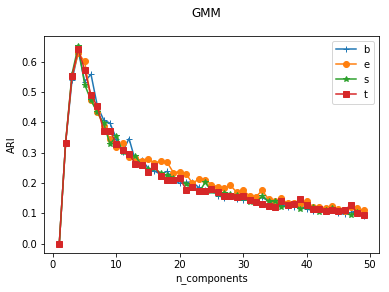

In [53]:
centers = [[1,1],[2,2],[1,2],[10,20]]
X,labels_true = create_data(centers,num = 1000,std = 0.5)
test_GMM_n_cov_type(X,labels_true)